Ce codebook a pour objectif de réaliser les premières régressions sur notre DVF.

A ce stade, le DVF que l'on utilise est "DVF_avec_risques_inondations_propre.csv" qui est notre DVF nettoyé (les valeurs aberrantes du prix par mètre carré ont été supprimé) et avec comme variables supplémentaires : les indicatrices de risque d'inondation liées à georisques.gouv

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/home/onyxia/work/projet_statapp_inondations-4/data/DVF_avec_risques_inondations_propre.csv")

## Partie 1 : Une première régression sans les risques d'inondation

In [ ]:
X = df[["surface_reelle_bati", "surface_terrain","nombre_pieces_principales","nombre_dependances", "valeur_fonciere"]]
X = sm.add_constant(X)

Y = df[["prix_maison"]]

In [22]:
model = sm.OLS(Y, X).fit(cov_type='HC3')
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            prix_maison   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     4920.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:39:06   Log-Likelihood:            -1.4252e+06
No. Observations:              109300   AIC:                         2.850e+06
Df Residuals:                  109294   BIC:                         2.850e+06
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Partie 2 : Influence des risques d'inondation

On regarde la matrice de variance-covariance

In [33]:
X = df[["surface_reelle_bati", "surface_terrain","nombre_pieces_principales","nombre_dependances", "valeur_fonciere", "risque_debordement_fort","risque_debordement_moyen","risque_debordement_faible", "risque_submersion_fort","risque_submersion_moyen","risque_submersion_faible"]]


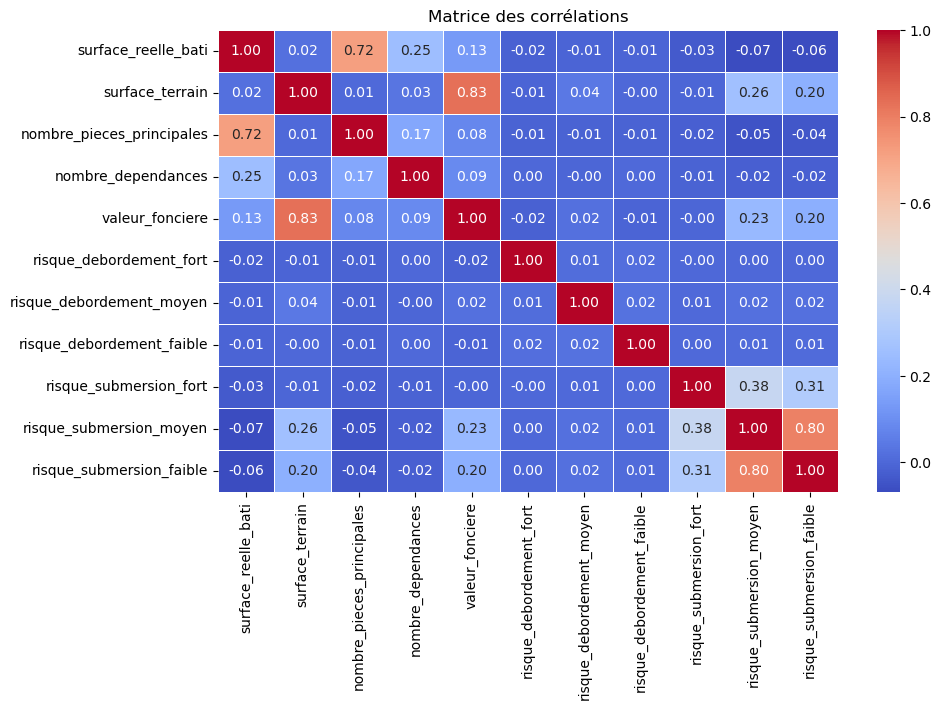

In [34]:
corr_matrix = X.corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice des corrélations")
plt.show()


On enlève valeur_fonciere qui est très fortement corrélée avec la surface du terrain

In [35]:
X = df[["surface_reelle_bati", "surface_terrain","nombre_pieces_principales","nombre_dependances", "valeur_fonciere", "risque_debordement_fort","risque_debordement_moyen","risque_debordement_faible", "risque_submersion_fort","risque_submersion_moyen","risque_submersion_faible"]]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit(cov_type='HC3')
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            prix_maison   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     2343.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:59:15   Log-Likelihood:            -1.4245e+06
No. Observations:              109300   AIC:                         2.849e+06
Df Residuals:                  109288   BIC:                         2.849e+06
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 